In [1]:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.ticker as mtick
from adjustText import adjust_text

# Set display options
pd.options.display.float_format = '{:,.2f}'.format

# Load your data
clark_county_ts2021 = pd.read_csv("H:/My Drive/7. SNV Industry Study/SNV_ArcGIS/IHS Files/Clark_County_TS2021.csv")
bridges_excel = pd.ExcelFile("H:/My Drive/7. SNV Industry Study/SNV_ArcGIS/IHS Files/bridges.xlsx")
US_2020_CSA = pd.read_csv("H:/My Drive/7. SNV Industry Study/SNV_ArcGIS/IHS Files/2020_US_CSA.csv")

# Load necessary sheets from the Excel file
stcc = bridges_excel.parse("STCC")
regions = bridges_excel.parse("Regions")
modes = bridges_excel.parse("Modes")
county_region = bridges_excel.parse("County to Region")

# Checking for duplicates
clark_county_ts2021 = clark_county_ts2021.drop_duplicates()
US_2020_CSA = US_2020_CSA.drop_duplicates()

# Define origin_regions and destination_regions separately
origin_regions = regions.rename(columns={"Region": "Origin Region", "Region Name": "Origin Region Name"})
destination_regions = regions.rename(columns={"Region": "Destination Region", "Region Name": "Destination Region Name"})

# Merge origin_regions and destination_regions into clark_county_ts2021
clark_county_ts2021 = pd.merge(clark_county_ts2021, origin_regions, on='Origin Region', how='left')
clark_county_ts2021 = pd.merge(clark_county_ts2021, destination_regions, on='Destination Region', how='left')
# Merge the summary by mode with the modes table
clark_county_ts2021 = pd.merge(clark_county_ts2021, modes, how='left', on='Mode')
# Rename the rest of the columns
clark_county_ts2021.rename(columns={
    'State_x': 'Origin State', 
    'BEA_x': 'Origin BEA', 
    'BEA Name_x': 'Origin BEA Name', 
    'Country_x': 'Origin Country', 
    'State_y': 'Destination State', 
    'BEA_y': 'Destination BEA', 
    'BEA Name_y': 'Destination BEA Name', 
    'Country_y': 'Destination Country'}, inplace=True)

# Print DataFrame to check
#print(clark_county_ts2021)


In [1]:
#!pip install adjustText
#modes

US_2020_CSA

NameError: name 'US_2020_CSA' is not defined

In [94]:
print(clark_county_ts2021.columns)


Index(['Year', 'Origin Region', 'Destination Region', 'STCC', 'Trade Type',
       'Mode', 'Tons', 'Units', 'Value', 'Average Miles', 'First Node',
       'Last Node', 'From FIPS', 'To FIPS', 'Entry Road', 'Exit Road',
       'Origin Region Name', 'Origin State', 'Origin BEA', 'Origin BEA Name',
       'Origin Country', 'Destination Region Name', 'Destination State',
       'Destination BEA', 'Destination BEA Name', 'Destination Country',
       'Code', 'Name', 'Group'],
      dtype='object')


In [3]:
# Outbound: Origin is Clark County
clark_county_outbound = clark_county_ts2021[
    (clark_county_ts2021['Origin Region Name'] == "Clark County, NV") & 
    (clark_county_ts2021['Destination Region Name'] != "Clark County, NV")]

# Inbound: Destination is Clark County
clark_county_inbound = clark_county_ts2021[
    (clark_county_ts2021['Destination Region Name'] == "Clark County, NV") & 
    (clark_county_ts2021['Origin Region Name'] != "Clark County, NV")]

# Through: Clark County is neither origin nor destination
clark_county_through = clark_county_ts2021[
    (clark_county_ts2021['Origin Region Name'] != "Clark County, NV") & 
    (clark_county_ts2021['Destination Region Name'] != "Clark County, NV")]

# Intra: Both origin and destination is Clark County
clark_county_intra = clark_county_ts2021[
    (clark_county_ts2021['Origin Region Name'] == "Clark County, NV") & 
    (clark_county_ts2021['Destination Region Name'] == "Clark County, NV")]

# Apply the function to each data frame
def calculate_totals(df, name_prefix):
    summary = df.groupby('Year').agg({
        'Units': 'sum',
        'Tons': 'sum',
        'Value': 'sum',
        'Average Miles': 'sum',
    })
    summary.columns = [name_prefix + "_" + col for col in summary.columns]
    return summary

# Apply the function to each data frame
clark_county_outbound_summary = calculate_totals(clark_county_outbound, "OB")
clark_county_inbound_summary = calculate_totals(clark_county_inbound, "IB")
clark_county_through_summary = calculate_totals(clark_county_through, "Thr")
clark_county_intra_summary = calculate_totals(clark_county_intra, "Intra")

# Combine all four summary data frames into one
combined_summary = pd.concat(
    [clark_county_outbound_summary, clark_county_inbound_summary, clark_county_through_summary, clark_county_intra_summary], 
    axis=1
)

#print(combined_summary)


In [4]:
combined_summary

OB_Units      OB_Tons          OB_Value  OB_Average Miles  \
Year                                                                 
2015   789,880.98 6,183,712.94  6,202,921,475.09     25,621,347.49   
2019   800,132.58 5,938,486.84  6,674,945,429.30     25,663,317.72   
2021   804,972.97 6,005,612.78  6,973,932,656.07     25,663,397.62   
2050 1,118,946.06 7,766,694.36 11,851,991,921.96     25,631,020.05   

         IB_Units       IB_Tons          IB_Value  IB_Average Miles  \
Year                                                                  
2015   899,169.06 17,626,773.93 28,225,429,265.10     99,783,914.14   
2019   931,883.84 18,564,082.14 28,270,084,718.14     99,962,277.58   
2021   924,033.75 18,466,965.09 29,164,939,778.87     99,970,345.71   
2050 1,325,602.88 26,519,129.09 48,826,832,668.65     99,874,426.40   

        Thr_Units      Thr_Tons          Thr_Value  Thr_Average Miles  \
Year                                                                    
2015 2,544,029.75 50,703,141.21 121,708,883,660.12     321,046,047.56   
2019 2,453,413.83 48,618,219.47 113,917,720,717.06     321,407,942.32   
2021 2,445,741.84 48,641,284.92 114,413,976,503.17     321,466,815.98   
2050 3,812,878.01 74,969,609.57 202,800,890,895.13     321,018,019.72   

      Intra_Units    Intra_Tons       Intra_Value  Intra_Average Miles  
Year                                                                    
2015 1,684,746.52 16,103,705.24  8,165,315,556.74             9,536.00  
2019 1,704,981.23 16,334,851.80  9,045,946,515.97             9,536.00  
2021 1,694,696.27 16,066,484.56  9,073,076,083.51             9,536.00  
2050 2,067,651.19 18,671,031.26 11,846,198,902.07             9,536.00

In [ ]:
combined_summary

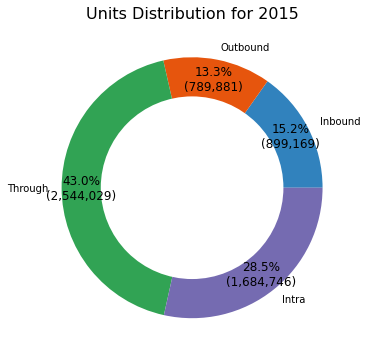

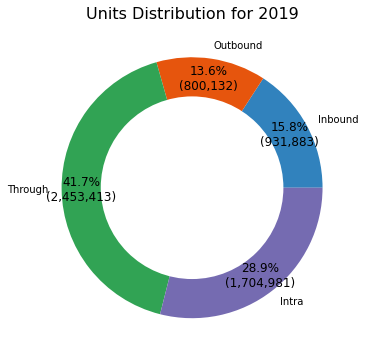

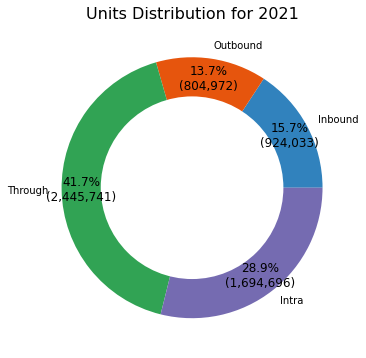

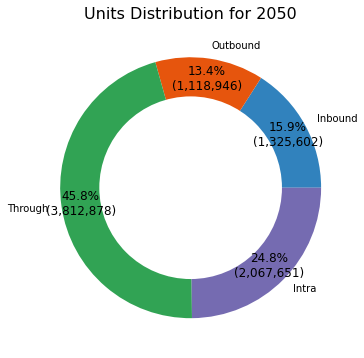

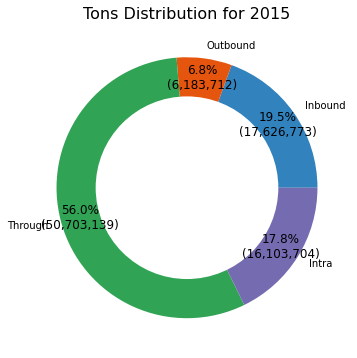

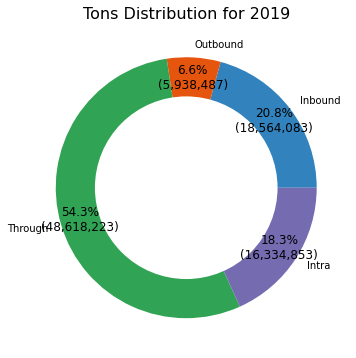

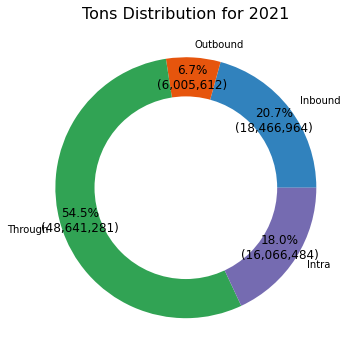

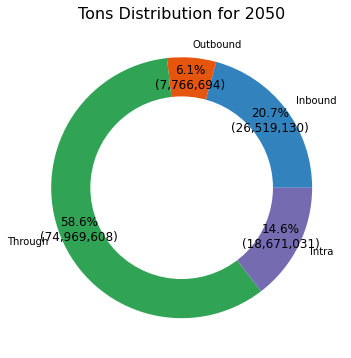

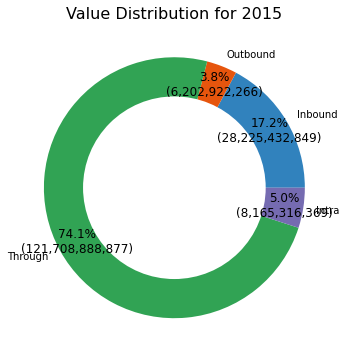

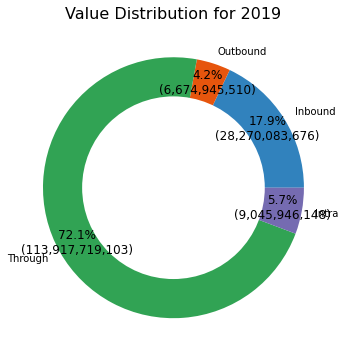

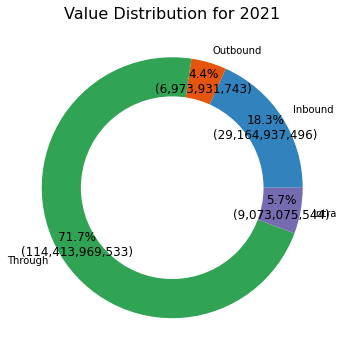

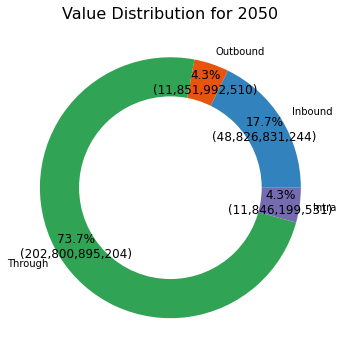

In [33]:
import seaborn as sns
from matplotlib.patches import Patch
# Define a color map
cmap = plt.get_cmap("tab20c")

# Choose the colors
colors = cmap(np.arange(4)*4)

def create_pie_charts(df, variable):
    for year in df.index:
        # Create a new figure for each year
        plt.figure(figsize=(10,6))

        # Create a dataset for the current year
        data = df.loc[year, [f'IB_{variable}', f'OB_{variable}', f'Thr_{variable}', f'Intra_{variable}']]

        # Define the labels
        labels = ['Inbound', 'Outbound', 'Through', 'Intra']

        # Format the autopct to include values in thousands comma separated
        autopct = lambda pct: f"{pct:.1f}%\n({int(pct * np.sum(data) / 100):,})"

        # Create a pie chart
        wedges, texts, autotexts = plt.pie(data, labels=labels, autopct=autopct, pctdistance=0.85, colors=colors)

        # Draw a white circle at the center (for "donut" style)
        centre_circle = plt.Circle((0,0),0.70,fc='white')
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)

        # Increase the size of the labels and set their color to black
        for text in texts:
            text.set_color('black')
        for autotext in autotexts:
            autotext.set_color('black')
            autotext.set_size('large')

        # Add a title
        plt.title(f"{variable} Distribution for {year}", fontsize=16)

        # Show the plot
        plt.show()

# Use the function for Units
create_pie_charts(combined_summary, 'Units')

# Use the function for Tons
create_pie_charts(combined_summary, 'Tons')

# Use the function for Value
create_pie_charts(combined_summary, 'Value')


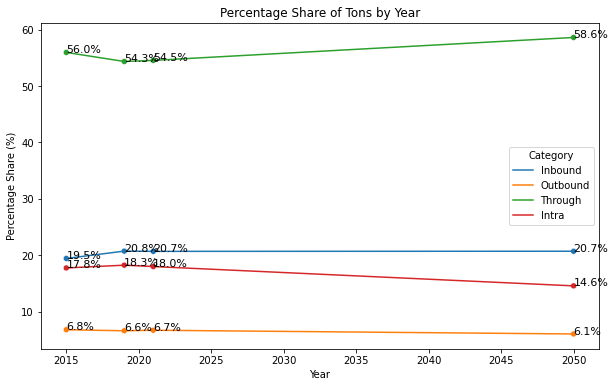

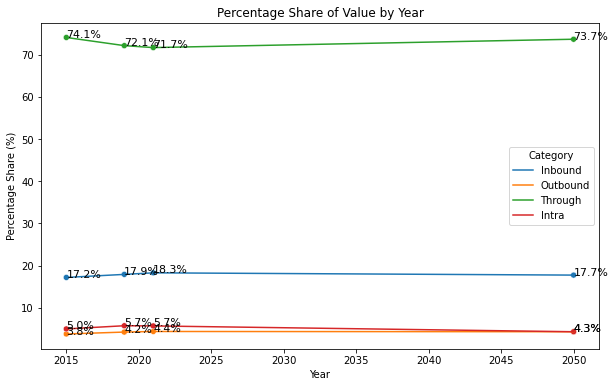

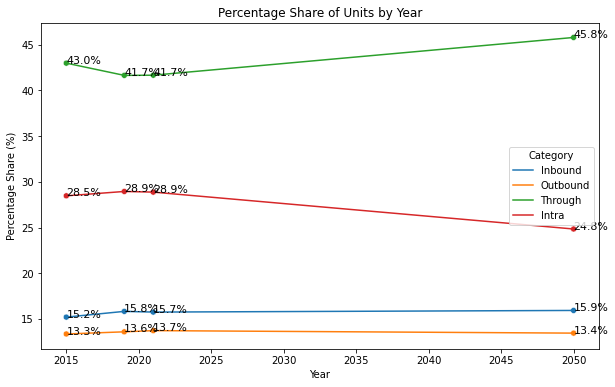

In [34]:


def create_time_series(df, variable):
    # Create a new DataFrame for plotting
    plot_data = df[[f'IB_{variable}', f'OB_{variable}', f'Thr_{variable}', f'Intra_{variable}']].copy()

    # Rename the columns for the legend
    plot_data.rename(columns={
        f'IB_{variable}': 'Inbound', 
        f'OB_{variable}': 'Outbound',
        f'Thr_{variable}': 'Through',
        f'Intra_{variable}': 'Intra'
        }, inplace=True)

    # Reset the index so 'Year' becomes a column in the DataFrame
    plot_data.reset_index(inplace=True)

    # Melt the DataFrame into a format that's suitable for Seaborn
    plot_data = plot_data.melt(id_vars='Year', var_name='Category', value_name=variable)

    # Calculate the percentage of each category
    total = plot_data.groupby('Year')[variable].transform('sum')
    plot_data[variable] = 100 * plot_data[variable] / total

    # Create the time series plot
    plt.figure(figsize=(10,6))
    plot = sns.lineplot(data=plot_data, x='Year', y=variable, hue='Category')

    # Add a scatterplot to highlight the years with data
    points = sns.scatterplot(data=plot_data, x='Year', y=variable, hue='Category', legend=False)

    # Add labels to the scatterplot points
    for line in range(0,plot_data.shape[0]):
        points.text(plot_data.Year[line], plot_data[variable][line], 
                    f'{plot_data[variable][line]:.1f}%', horizontalalignment='left', 
                    size='11', color='black')

    plt.title(f'Percentage Share of {variable} by Year')
    plt.ylabel('Percentage Share (%)')
    plt.show()



# Use the function for Tons
create_time_series(combined_summary, 'Tons')

create_time_series(combined_summary, 'Value')

create_time_series(combined_summary, 'Units')

### BEST TIME SERIES USED IN PAPER

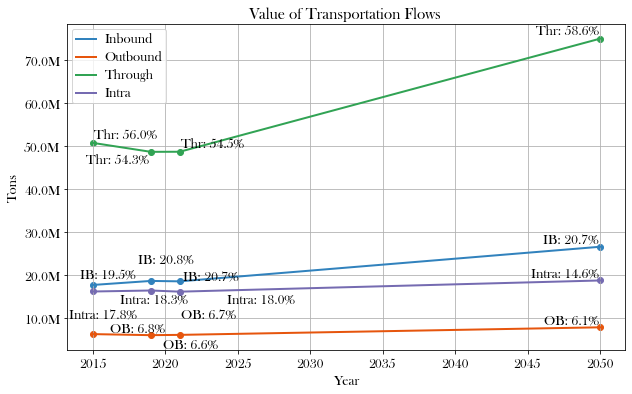

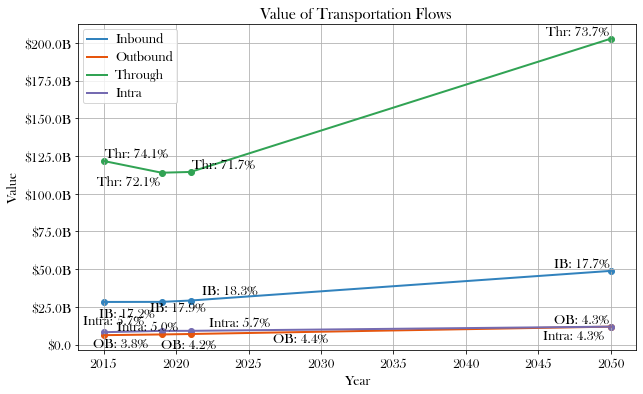

In [138]:
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
import seaborn as sns
from matplotlib.patches import Patch
import matplotlib.ticker as mtick
from adjustText import adjust_text

# Define a color map
cmap = plt.get_cmap("tab20c")

# Choose the colors
colors = cmap(np.arange(4)*4)
font = FontProperties(family='Baskerville Old Face')

def value_formatter(x, pos):
    if x >= 1_000_000_000:
        return f'${x / 1_000_000_000:.1f}B'
    elif x >= 1_000_000:
        return f'${x / 1_000_000:.1f}M'
    elif x >= 1_000:
        return f'${x / 1_000:.1f}K'
    else:
        return f'${x}'

def tons_formatter(x, pos):
    return f'{x / 1_000_000:.1f}M' if x >= 1_000_000 else f'{x / 1_000:.1f}K' if x >= 1_000 else str(x)

def create_time_series(df, variable):
    plot_data = df[[f'IB_{variable}', f'OB_{variable}', f'Thr_{variable}', f'Intra_{variable}']].reset_index()

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot('Year', f'IB_{variable}', data=plot_data, color=colors[0], linewidth=2, label='Inbound')
    ax.plot('Year', f'OB_{variable}', data=plot_data, color=colors[1], linewidth=2, label='Outbound')
    ax.plot('Year', f'Thr_{variable}', data=plot_data, color=colors[2], linewidth=2, label='Through')
    ax.plot('Year', f'Intra_{variable}', data=plot_data, color=colors[3], linewidth=2, label='Intra')
    
    legend = ax.legend(prop=font, loc='upper left')
    plt.setp(legend.get_texts(), fontsize='14')

    ax.scatter('Year', f'IB_{variable}', data=plot_data, color=colors[0])
    ax.scatter('Year', f'OB_{variable}', data=plot_data, color=colors[1])
    ax.scatter('Year', f'Thr_{variable}', data=plot_data, color=colors[2])
    ax.scatter('Year', f'Intra_{variable}', data=plot_data, color=colors[3])

    if variable == 'Tons':
        ax.yaxis.set_major_formatter(FuncFormatter(tons_formatter))
    else:
        ax.yaxis.set_major_formatter(FuncFormatter(value_formatter))

    texts = []
    for line in range(0, plot_data.shape[0]):
        for col in [f'IB_{variable}', f'OB_{variable}', f'Thr_{variable}', f'Intra_{variable}']:
            percent = plot_data[col][line] / plot_data[[f'IB_{variable}', f'OB_{variable}', f'Thr_{variable}', f'Intra_{variable}']].iloc[line].sum() * 100
            label = col.split('_')[0]
            texts.append(ax.text(plot_data.Year[line], plot_data[col][line], f'{label}: {percent:.1f}%', fontsize=14, color='black', fontproperties=font))

    adjust_text(texts)

    ax.set_title(f'Value of Transportation Flows ', fontsize=16, fontproperties=font)
    ax.set_xlabel('Year', fontsize=14, fontproperties=font)
    ax.set_ylabel(f'{variable}', fontsize=14, fontproperties=font)
    ax.grid(True)

    # Adjusting the font properties for the axis tick labels
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontproperties(font)
        tick.label.set_fontsize(14)

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontproperties(font)
        tick.label.set_fontsize(14)

    plt.show()

create_time_series(combined_summary, 'Tons')
create_time_series(combined_summary, 'Value')


In [36]:
def calculate_total_and_percent(df, variable):
    summary = pd.DataFrame()
    
    for prefix in ["IB", "OB", "Thr", "Intra"]:
        summary[f"{prefix}_{variable}_total"] = df[f"{prefix}_{variable}"]
        summary[f"{prefix}_{variable}_percent"] = df[f"{prefix}_{variable}"] / df[[f"{prefix}_{variable}" for prefix in ["IB", "OB", "Thr", "Intra"]]].sum(axis=1) * 100

    return summary

# Recalculate the percentages and total
units_total_percent = calculate_total_and_percent(combined_summary, 'Units')
print(units_total_percent)
tons_total_percent = calculate_total_and_percent(combined_summary, 'Tons')
print(tons_total_percent)
value_total_percent = calculate_total_and_percent(combined_summary, 'Value')
print(value_total_percent)


      IB_Units_total  IB_Units_percent  OB_Units_total  OB_Units_percent  \
Year                                                                       
2015      899,169.06             15.19      789,880.98             13.35   
2019      931,883.84             15.82      800,132.58             13.58   
2021      924,033.75             15.74      804,972.97             13.71   
2050    1,325,602.88             15.92    1,118,946.06             13.44   

      Thr_Units_total  Thr_Units_percent  Intra_Units_total  \
Year                                                          
2015     2,544,029.75              42.99       1,684,746.52   
2019     2,453,413.83              41.65       1,704,981.23   
2021     2,445,741.84              41.67       1,694,696.27   
2050     3,812,878.01              45.80       2,067,651.19   

      Intra_Units_percent  
Year                       
2015                28.47  
2019                28.95  
2021                28.87  
2050                24.8

## Summary by MODE.


In [37]:
# Summary by 'Mode'
summary_by_mode = clark_county_ts2021.groupby(['Mode', 'Year']).agg({
    'Units': 'sum',
    'Tons': 'sum',
    'Value': 'sum',
    'Average Miles': 'sum'
}).reset_index()
# Merge the summary by mode with the modes table
summary_by_mode = pd.merge(summary_by_mode, modes, how='left', on='Mode')

summary_by_mode

Mode  Year        Units          Tons              Value  Average Miles  \
0      3  2015    60,188.67  2,026,542.37  10,854,826,021.58           0.00   
1      3  2019    53,065.89  1,763,708.61   9,195,948,959.23           0.00   
2      3  2021    54,332.03  2,047,615.70   8,250,552,902.44           0.00   
3      3  2050    97,593.65  4,166,494.08  13,404,209,691.71           0.00   
4      4  2015 2,769,565.20 44,224,758.01  86,931,914,270.96 213,164,537.85   
5      4  2019 2,763,206.36 43,893,430.38  84,195,966,893.61 213,434,843.58   
6      4  2021 2,727,930.73 43,240,464.69  84,502,888,803.76 213,466,775.30   
7      4  2050 3,913,318.28 61,686,311.20 142,968,723,473.37 213,176,969.85   
8      5  2015   207,723.30  3,481,204.43  11,825,326,442.58 121,949,971.12   
9      5  2019   209,157.58  3,450,758.74  11,483,623,567.50 122,207,376.32   
10     5  2021   209,848.12  3,438,196.47  11,629,924,483.45 122,230,876.30   
11     5  2050   357,835.66  5,631,655.71  22,239,656,723.78 121,979,433.47   
12     6  2015 2,717,151.95 37,625,799.53  40,003,554,690.82  75,414,759.80   
13     6  2019 2,718,899.50 37,442,626.73  39,442,871,180.36  75,458,011.92   
14     6  2021 2,706,061.68 37,033,493.65  39,864,440,434.05  75,469,543.40   
15     6  2050 3,582,247.34 49,109,783.63  63,296,306,656.26  75,437,366.31   
16     7  2015   163,197.18  3,152,993.89  14,059,507,111.56  35,931,576.42   
17     7  2019   146,082.16  2,800,419.83  12,951,034,994.40  35,942,841.79   
18     7  2021   171,272.27  3,312,214.01  14,727,225,258.98  35,942,900.31   
19     7  2050   374,083.22  7,163,817.46  32,262,363,404.76  35,939,232.54   
20     8  2015         0.00    105,534.20     625,175,588.86           0.00   
21     8  2019         0.00    104,212.69     637,079,767.10           0.00   
22     8  2021         0.00    107,883.18     648,700,819.76           0.00   
23     8  2050         0.00    167,689.74   1,151,270,131.88           0.00   
24    10  2015         0.00        500.88       2,245,830.68           0.00   
25    10  2019         0.00        483.28       2,172,018.27           0.00   
26    10  2021         0.00        479.65       2,192,319.16           0.00   
27    10  2050         0.00        712.47       3,384,306.08           0.00   

     Code             Name  Group  
0    RAIL         Rail NEC   Rail  
1    RAIL         Rail NEC   Rail  
2    RAIL         Rail NEC   Rail  
3    RAIL         Rail NEC   Rail  
4      TL  Truck Truckload  Truck  
5      TL  Truck Truckload  Truck  
6      TL  Truck Truckload  Truck  
7      TL  Truck Truckload  Truck  
8     LTL      Truck L-T-L  Truck  
9     LTL      Truck L-T-L  Truck  
10    LTL      Truck L-T-L  Truck  
11    LTL      Truck L-T-L  Truck  
12    PVT        Truck PVT  Truck  
13    PVT        Truck PVT  Truck  
14    PVT        Truck PVT  Truck  
15    PVT        Truck PVT  Truck  
16  TRUCK        Truck NEC  Truck  
17  TRUCK        Truck NEC  Truck  
18  TRUCK        Truck NEC  Truck  
19  TRUCK        Truck NEC  Truck  
20    AIR              Air    Air  
21    AIR              Air    Air  
22    AIR              Air    Air  
23    AIR              Air    Air  
24    OTH            Other    Oth  
25    OTH            Other    Oth  
26    OTH            Other    Oth  
27    OTH            Other    Oth

In [38]:
summary_by_mode_IB = summary_by_mode['Name']
summary_by_mode_IB

0            Rail NEC
1            Rail NEC
2            Rail NEC
3            Rail NEC
4     Truck Truckload
5     Truck Truckload
6     Truck Truckload
7     Truck Truckload
8         Truck L-T-L
9         Truck L-T-L
10        Truck L-T-L
11        Truck L-T-L
12          Truck PVT
13          Truck PVT
14          Truck PVT
15          Truck PVT
16          Truck NEC
17          Truck NEC
18          Truck NEC
19          Truck NEC
20                Air
21                Air
22                Air
23                Air
24              Other
25              Other
26              Other
27              Other
Name: Name, dtype: object

In [120]:
def calculate_totals(data, direction):
    # Assuming the columns 'Tons' and 'Value' contain the required data
    summary = data.groupby('Year').agg({
        'Tons': 'sum',
        'Value': 'sum'
    }).rename(columns={'Tons': f'{direction}_Tons', 'Value': f'{direction}_Value'})
    return summary


def generate_summary_by_mode(mode_name):
    # Filter data for specified mode
    clark_county_mode = clark_county_ts2021[clark_county_ts2021['Name'] == mode_name]

    # Outbound: Origin is Clark County
    clark_county_outbound_mode = clark_county_mode[
        (clark_county_mode['Origin Region Name'] == "Clark County, NV") & 
        (clark_county_mode['Destination Region Name'] != "Clark County, NV")]

    # Inbound: Destination is Clark County
    clark_county_inbound_mode = clark_county_mode[
        (clark_county_mode['Destination Region Name'] == "Clark County, NV") & 
        (clark_county_mode['Origin Region Name'] != "Clark County, NV")]

    # Through: Clark County is neither origin nor destination
    clark_county_through_mode = clark_county_mode[
        (clark_county_mode['Origin Region Name'] != "Clark County, NV") & 
        (clark_county_mode['Destination Region Name'] != "Clark County, NV")]

    # Intra: Both origin and destination is Clark County
    clark_county_intra_mode = clark_county_mode[
        (clark_county_mode['Origin Region Name'] == "Clark County, NV") & 
        (clark_county_mode['Destination Region Name'] == "Clark County, NV")]

    # Apply the function to each data frame
    clark_county_outbound_summary_mode = calculate_totals(clark_county_outbound_mode, "OB")
    clark_county_inbound_summary_mode = calculate_totals(clark_county_inbound_mode, "IB")
    clark_county_through_summary_mode = calculate_totals(clark_county_through_mode, "Thr")
    clark_county_intra_summary_mode = calculate_totals(clark_county_intra_mode, "Intra")

    # Combine all four summary data frames into one
    combined_summary_mode = pd.concat(
        [clark_county_outbound_summary_mode, clark_county_inbound_summary_mode, clark_county_through_summary_mode, clark_county_intra_summary_mode], 
        axis=1
    )
    
    return combined_summary_mode


In [121]:
# Generate summary for 'Truck Truckload' mode
combined_summary_tl = generate_summary_by_mode('Truck Truckload')
combined_summary_rn = generate_summary_by_mode('Rail NEC')
combined_summary_tltl = generate_summary_by_mode('Truck L-T-L')


combined_summary_tpvt = generate_summary_by_mode('Truck PVT')
combined_summary_tnec = generate_summary_by_mode('Truck NEC')
combined_summary_air = generate_summary_by_mode('Air')
combined_summary_oth = generate_summary_by_mode('Other')

#clark_county_ts2021
# Print the summary
# print(combined_summary_tl)
# print(combined_summary_rn)
# print(combined_summary_tltl)

# print(combined_summary_tpvt)
# print(combined_summary_tnec)
# print(combined_summary_air)
# print(combined_summary_oth)

In [97]:
# Add a 'Mode' column to each summary DataFrame
combined_summary_tl['Mode'] = 'Truck Truckload'
combined_summary_rn['Mode'] = 'Rail NEC'
combined_summary_tltl['Mode'] = 'Truck L-T-L'
combined_summary_tpvt['Mode'] = 'Truck PVT'
combined_summary_tnec['Mode'] = 'Truck NEC'
combined_summary_air['Mode'] = 'Air'
combined_summary_oth['Mode'] = 'Other'

# Concatenate all the summary DataFrames
all_summaries = pd.concat([
    combined_summary_tl,
    combined_summary_rn,
    combined_summary_tltl,
    combined_summary_tpvt,
    combined_summary_tnec,
    combined_summary_air,
    combined_summary_oth
])

# Optionally, reset the index if you want 'Year' as a regular column
all_summaries.reset_index(inplace=True)

# Print the combined DataFrame
print(all_summaries)


    Year           OB            IB           Thr         Intra  \
0   2015 2,584,410.50  9,164,008.92 27,838,555.31  4,637,783.28   
1   2019 2,543,640.52  9,528,689.88 27,155,589.80  4,665,510.18   
2   2021 2,549,877.38  9,304,582.95 26,858,946.11  4,527,058.26   
3   2050 3,358,983.04 13,102,312.63 40,071,885.86  5,153,129.67   
4   2015    19,090.05    221,483.69  1,785,968.63           nan   
5   2019    10,531.54    209,544.18  1,543,632.89           nan   
6   2021     8,848.49    322,670.79  1,716,096.42           nan   
7   2050     8,499.22    709,299.92  3,448,694.94           nan   
8   2015   198,735.28    670,940.84  2,494,063.06    117,465.25   
9   2019   242,834.88    659,817.12  2,412,544.65    135,562.09   
10  2021   261,892.04    666,012.78  2,368,732.37    141,559.28   
11  2050   480,238.11  1,076,392.07  3,838,397.49    236,628.04   
12  2015 3,189,621.48  7,352,933.91 15,734,787.43 11,348,456.71   
13  2019 2,979,733.86  7,876,244.68 15,052,868.65 11,533,779.5

In [122]:
def calculate_totals(df, mode_type):
    # Calculate the total tons for each year
    totals = df.groupby('Year')['Tons'].sum()

    # Create a DataFrame from the totals
    summary = pd.DataFrame(totals)

    # Rename the 'Tons' column to the mode type
    summary.rename(columns={'Tons': mode_type}, inplace=True)

    return summary



def generate_summary_all_modes():
    # Get all unique modes
    all_modes = clark_county_ts2021['Name'].unique()

    # Initialize an empty DataFrame to store all summaries
    all_modes_summary = pd.DataFrame()

    for mode_name in all_modes:
        # Filter data for current mode
        clark_county_mode = clark_county_ts2021[clark_county_ts2021['Name'] == mode_name]

        # Outbound: Origin is Clark County
        clark_county_outbound_mode = clark_county_mode[
            (clark_county_mode['Origin Region Name'] == "Clark County, NV") & 
            (clark_county_mode['Destination Region Name'] != "Clark County, NV")]

        # Inbound: Destination is Clark County
        clark_county_inbound_mode = clark_county_mode[
            (clark_county_mode['Destination Region Name'] == "Clark County, NV") & 
            (clark_county_mode['Origin Region Name'] != "Clark County, NV")]

        # Through: Clark County is neither origin nor destination
        clark_county_through_mode = clark_county_mode[
            (clark_county_mode['Origin Region Name'] != "Clark County, NV") & 
            (clark_county_mode['Destination Region Name'] != "Clark County, NV")]

        # Intra: Both origin and destination is Clark County
        clark_county_intra_mode = clark_county_mode[
            (clark_county_mode['Origin Region Name'] == "Clark County, NV") & 
            (clark_county_mode['Destination Region Name'] == "Clark County, NV")]

        # Apply the function to each data frame
        clark_county_outbound_summary_mode = calculate_totals(clark_county_outbound_mode, "OB")
        clark_county_inbound_summary_mode = calculate_totals(clark_county_inbound_mode, "IB")
        clark_county_through_summary_mode = calculate_totals(clark_county_through_mode, "Thr")
        clark_county_intra_summary_mode = calculate_totals(clark_county_intra_mode, "Intra")

        # Combine all four summary data frames into one
        combined_summary_mode = pd.concat(
            [clark_county_outbound_summary_mode, clark_county_inbound_summary_mode, clark_county_through_summary_mode, clark_county_intra_summary_mode], 
            axis=1
        )

        # Add a new column for the mode name
        combined_summary_mode['Name'] = mode_name

        # Append the summary for the current mode to the overall summary
        all_modes_summary = all_modes_summary.append(combined_summary_mode)
    
    # Reorder the columns
    all_modes_summary = all_modes_summary[['Year', 'Name', 'OB', 'IB', 'Thr', 'Intra', 'Tons']]

    return all_modes_summary



In [42]:
# summary = generate_summary_all_modes()
# summary

KeyError: "['Tons', 'Year'] not in index"

In [125]:
# Generate the summary for each mode
all_summaries = pd.concat([
    generate_summary_by_mode('Rail NEC'),
    generate_summary_by_mode('Truck Truckload'),
    generate_summary_by_mode('Truck L-T-L'),
    generate_summary_by_mode('Truck PVT'),
    generate_summary_by_mode('Truck NEC'),
    generate_summary_by_mode('Air'),
    generate_summary_by_mode('Other')
])

# Reset index to have 'Year' as a column
all_summaries = all_summaries.reset_index()

# Merge with the summary_by_mode DataFrame on 'Mode' and 'Year'
merged_summary = pd.merge(summary_by_mode, all_summaries, left_on=['Mode', 'Year'], right_on=['Mode', 'Year'], how='left')

# Melt the DataFrame if needed
summary_melted = pd.melt(merged_summary, id_vars=['Mode', 'Year', 'Code', 'Name', 'Group'], value_vars=['Units', 'Tons', 'Value', 'Average Miles'], var_name='Variable', value_name='Value')

# Pivot the DataFrame if needed
summary_pivoted = summary_melted.pivot_table(index=['Mode', 'Year', 'Code', 'Name', 'Group', 'Variable'], columns='Direction', values='Value', aggfunc='sum').reset_index()


KeyError: 'Mode'

In [43]:
def create_time_series(df, variable, mode_name):
    plot_data = df[[f'IB_{variable}', f'OB_{variable}', f'Thr_{variable}', f'Intra_{variable}']].reset_index()

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot('Year', f'IB_{variable}', data=plot_data, color=colors[0], linewidth=2, label='Inbound')
    ax.plot('Year', f'OB_{variable}', data=plot_data, color=colors[1], linewidth=2, label='Outbound')
    ax.plot('Year', f'Thr_{variable}', data=plot_data, color=colors[2], linewidth=2, label='Through')
    ax.plot('Year', f'Intra_{variable}', data=plot_data, color=colors[3], linewidth=2, label='Intra')
    
    ax.legend()

    ax.scatter('Year', f'IB_{variable}', data=plot_data, color=colors[0])
    ax.scatter('Year', f'OB_{variable}', data=plot_data, color=colors[1])
    ax.scatter('Year', f'Thr_{variable}', data=plot_data, color=colors[2])
    ax.scatter('Year', f'Intra_{variable}', data=plot_data, color=colors[3])

    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.2f}'))

    texts = []

    for line in range(0, plot_data.shape[0]):
        for col in [f'IB_{variable}', f'OB_{variable}', f'Thr_{variable}', f'Intra_{variable}']:
            percent = plot_data[col][line] / plot_data[[f'IB_{variable}', f'OB_{variable}', f'Thr_{variable}', f'Intra_{variable}']].iloc[line].sum() * 100
            label = col.split('_')[0]
            texts.append(ax.text(plot_data.Year[line], plot_data[col][line], f'{label}: {percent:.1f}%', size='medium', color='black'))

    adjust_text(texts)

    ax.set_title(f'{mode_name} - {variable} 2015, 2019, 2021, 2050', fontsize=16)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel(f'{variable}', fontsize=14)
    ax.grid(True)
    plt.show()


In [45]:
modes_names = ['Truck Truckload', 'Truck L-T-L', 'Truck PVT', 'Truck NEC', 'Air', 'Other']
for mode in modes_names:
    combined_summary_mode = generate_summary_by_mode(mode)
    print(combined_summary_mode.columns)  # print columns


Index(['OB', 'IB', 'Thr', 'Intra'], dtype='object')
Index(['OB', 'IB', 'Thr', 'Intra'], dtype='object')
Index(['OB', 'IB', 'Thr', 'Intra'], dtype='object')
Index(['OB', 'IB', 'Thr', 'Intra'], dtype='object')
Index(['OB', 'IB', 'Thr', 'Intra'], dtype='object')
Index(['OB', 'IB', 'Thr', 'Intra'], dtype='object')


In [46]:
def create_bar_chart(df, variable):
    fig, ax = plt.subplots(figsize=(10, 6))
    modes_names = df['Name'].unique()
    
    # Create a color palette
    colors = plt.cm.viridis(np.linspace(0, 1, len(modes_names)))

    for i, mode in enumerate(modes_names):
        plot_data = df[df['Name'] == mode]
        ax.bar(plot_data['Year'], plot_data[variable], color=colors[i], label=mode)
        
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.2f}'))
    
    ax.set_title(f'{variable} by Mode over Years', fontsize=16)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel(f'{variable}', fontsize=14)
    ax.grid(True)
    plt.show()


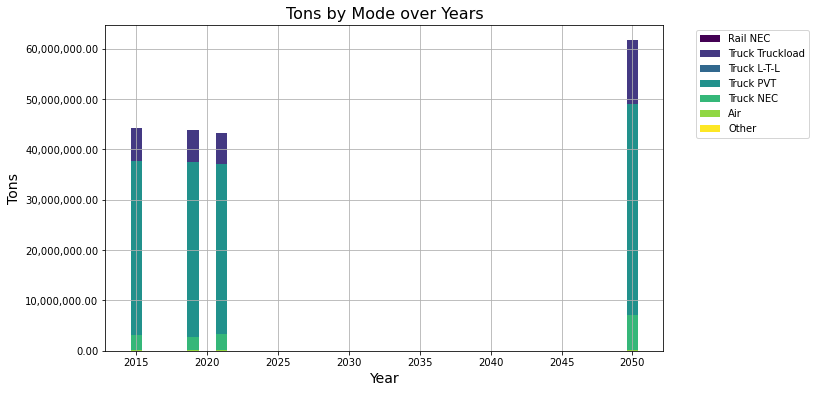

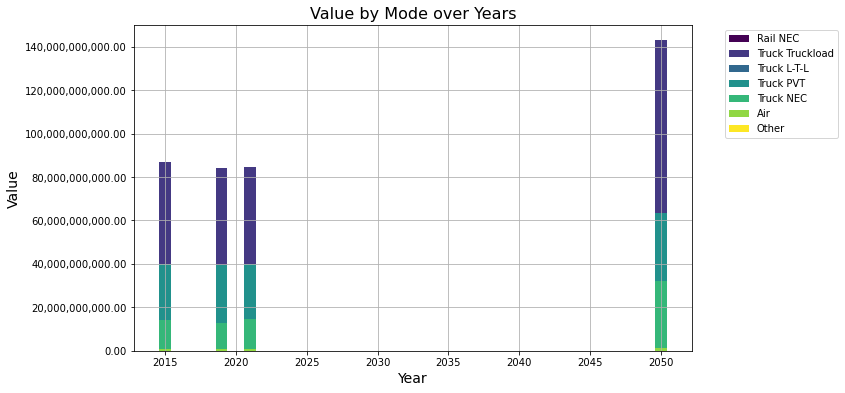

In [47]:
create_bar_chart(summary_by_mode, 'Tons')
create_bar_chart(summary_by_mode, 'Value')


In [89]:
print(summary_by_mode.columns)


Index(['Mode', 'Year', 'Units', 'Tons', 'Value', 'Average Miles', 'Code',
       'Name', 'Group'],
      dtype='object')


In [48]:
def create_grouped_bar_chart(df, variable):
    fig, ax = plt.subplots(figsize=(10, 6))
    modes_names = df['Name'].unique()
    
    # Define the width of the bars and the positions of the bar groups
    bar_width = 0.15
    bar_positions = np.arange(len(df['Year'].unique()))

    # Create a color palette
    colors = plt.cm.viridis(np.linspace(0, 1, len(modes_names)))

    for i, mode in enumerate(modes_names):
        mode_data = df[df['Name'] == mode]
        ax.bar(bar_positions + i*bar_width, mode_data[variable], color=colors[i], 
               label=mode, width=bar_width)
        
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.2f}'))

    # Set the x-ticks to be the years
    ax.set_xticks(bar_positions + bar_width*(len(modes_names)-1)/2)
    ax.set_xticklabels(df['Year'].unique())

    ax.set_title(f'{variable} by Mode over Years', fontsize=16)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel(f'{variable}', fontsize=14)
    ax.grid(True)
    plt.show()


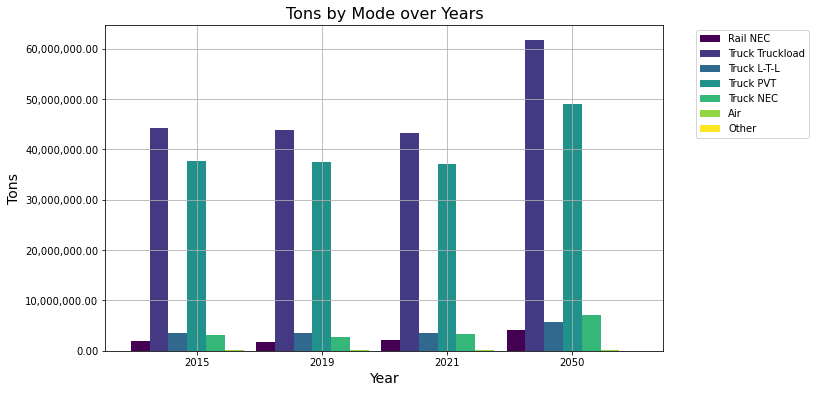

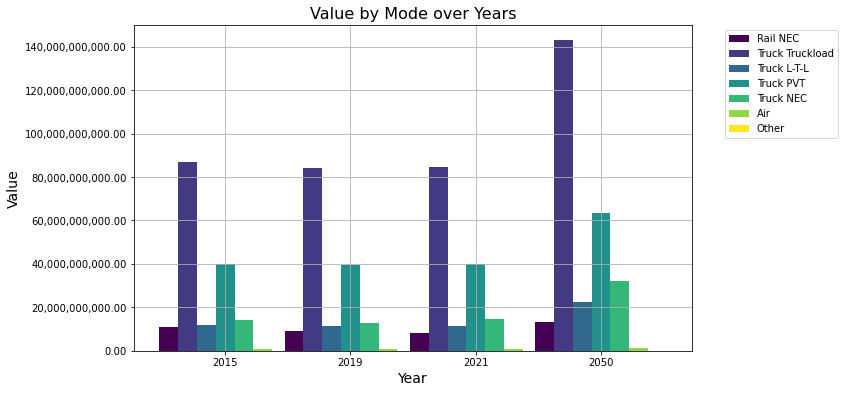

In [49]:

create_grouped_bar_chart(summary_by_mode, 'Tons')
create_grouped_bar_chart(summary_by_mode, 'Value')


In [27]:
import plotly.graph_objects as go
import plotly.express as px

def create_bar_chart(df, variable):
    # Light color sequence
    color_seq = px.colors.qualitative.Pastel

    # Create a list of unique mode names
    modes_names = df['Name'].unique()
    
    # Define the figure using go.Figure
    fig = go.Figure()

    # Filter dataframe to include only the specified years
    df = df[df['Year'].isin([2015, 2019, 2021, 2050])]

    # Convert Year column to string type to treat it as a categorical variable
    df['Year'] = df['Year'].astype(str)

    # Loop through the modes_names list and add each one as a trace to the figure
    for i, mode_name in enumerate(modes_names):
        # Filter data for the specific mode
        mode_data = df[df['Name'] == mode_name]
        
        fig.add_trace(go.Bar(
            x=mode_data['Year'],
            y=mode_data[variable],
            name=mode_name,  # Name will appear in the legend and in hover tooltips
            marker_color=color_seq[i % len(color_seq)],  # Use the color sequence
            marker_line=dict(color='rgb(0,0,0)', width=1)  # Add black outline to each bar
        ))

    fig.update_layout(
        title=f'Grouped Bar Chart of {variable} by Modes',
        xaxis_title='Year',
        yaxis_title=f'{variable}',
        barmode='group',  # Bars are grouped instead of stacked
        bargap=0.2,  # Space between bars of the same location coordinate
        bargroupgap=0.1,  # Space between bars of the same location coordinate
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),
        plot_bgcolor='rgb(255, 255, 255)',  # Set the background to white
        paper_bgcolor='rgb(255, 255, 255)',  # Set the paper background to white
        font=dict(color='rgb(0, 0, 0)'),  # Set the font color to black
        xaxis = dict(
            categoryorder = 'array', 
            categoryarray = ['2015', '2019', '2021', '2050']
        )
    )

    fig.show()

create_bar_chart(summary_by_mode, 'Tons')
create_bar_chart(summary_by_mode, 'Value')


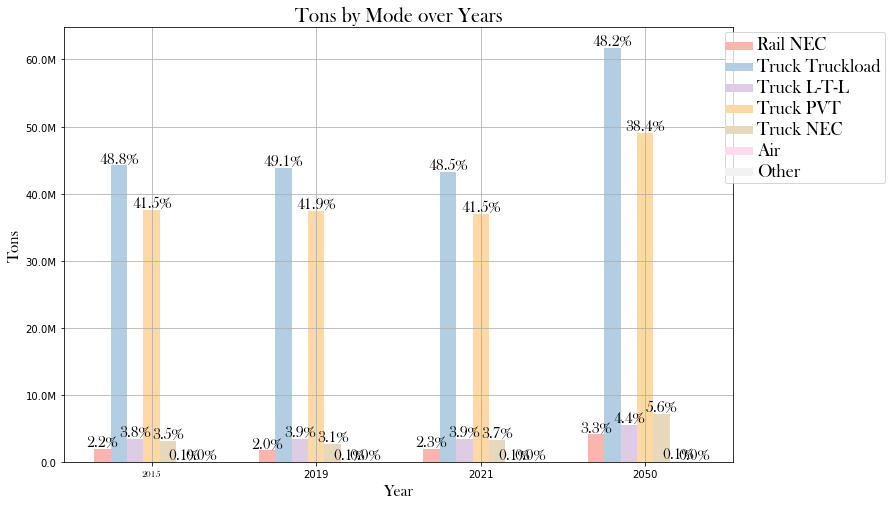

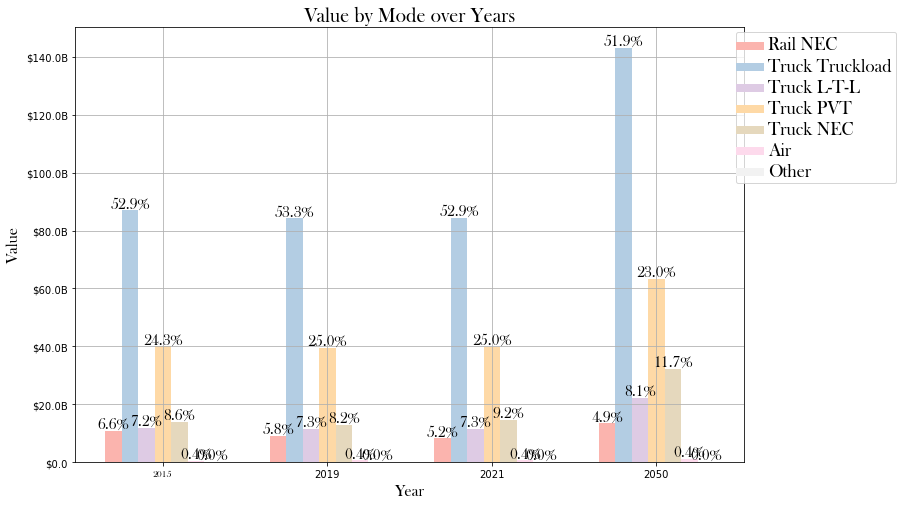

In [83]:
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FuncFormatter

font = FontProperties(family='Baskerville Old Face')

def tons_formatter(x, pos):
    return f'{x / 1_000_000:.1f}M' if x >= 1_000_000 else f'{x / 1_000:.1f}K' if x >= 1_000 else str(x)

def value_formatter(x, pos):
    return f'${x / 1_000_000_000:.1f}B' if x >= 1_000_000_000 else f'${x / 1_000_000:.1f}M' if x >= 1_000_000 else f'${x / 1_000:.1f}K' if x >= 1_000 else f'${x}'

def create_grouped_bar_chart(df, variable):
    fig, ax = plt.subplots(figsize=(12, 8))
    modes_names = df['Name'].unique()

    bar_width = 0.2
    bar_positions = np.arange(len(df['Year'].unique())) * 2

    colors = plt.cm.Pastel1(np.linspace(0, 1, len(modes_names)))

    for i, mode in enumerate(modes_names):
        mode_data = df[df['Name'] == mode]
        rects = ax.bar(bar_positions + i*bar_width, mode_data[variable], color=colors[i],
               label=mode, width=bar_width)

        year_total = df.groupby('Year')[variable].sum()
        for rect, year in zip(rects, mode_data['Year']):
            height = rect.get_height()
            percent = (height / year_total[year]) * 100
            ax.text(rect.get_x() + rect.get_width()/2., height,
                    f'{percent:.1f}%', ha='center', va='bottom', fontproperties=font, fontsize=16)
    
    # Manually create legend items with the desired font properties and size
    legend_elements = [plt.Line2D([0], [0], color=colors[i], lw=8, label=mode) for i, mode in enumerate(modes_names)]
    legend = ax.legend(handles=legend_elements, bbox_to_anchor=(0.98, 1), loc='upper left')

    # Apply font properties to the legend text
    for text in legend.get_texts():
        text.set_fontproperties(font)
        text.set_fontsize(18)  # Set desired font size here

    formatter = value_formatter if variable == 'Value' else tons_formatter
    ax.yaxis.set_major_formatter(FuncFormatter(formatter))

    ax.set_xticks(bar_positions + bar_width*(len(modes_names)-1)/2)
    ax.set_xticklabels(df['Year'].unique(), fontproperties=font)

    ax.set_title(f'{variable} by Mode over Years', fontsize=20, fontproperties=font)
    ax.set_xlabel('Year', fontsize=16, fontproperties=font)
    ax.set_ylabel(f'{variable}', fontsize=16, fontproperties=font)
    ax.grid(True)
    plt.show()

create_grouped_bar_chart(summary_by_mode, 'Tons')
create_grouped_bar_chart(summary_by_mode, 'Value')


In [114]:
# Combine all summaries into a single DataFrame
all_summaries = pd.concat([
    combined_summary_tl,
    combined_summary_rn,
    combined_summary_tltl,
    combined_summary_tpvt,
    combined_summary_tnec,
    combined_summary_air,
    combined_summary_oth
], axis=0).reset_index()

# Assuming 'all_summaries' contains both 'Value' and 'Tons' columns
value_data = pd.melt(all_summaries, id_vars=['Year', 'Mode'], value_vars=['OB', 'IB', 'Thr', 'Intra'], var_name='Direction', value_name='Value')
tons_data = pd.melt(all_summaries, id_vars=['Year', 'Mode'], value_vars=['OB', 'IB', 'Thr', 'Intra'], var_name='Direction', value_name='Tons')

# Concatenating both DataFrames and resetting the index
summary_data_wide = pd.concat([value_data, tons_data], axis=1).reset_index(drop=True)

# Merge the value_data and tons_data DataFrames on the common columns
summary_data_wide = pd.merge(value_data, tons_data, on=['Year', 'Mode', 'Direction'])

# Replace Direction codes with meaningful names (if needed)
direction_mapping = {
    'OB': 'Outbound',
    'IB': 'Inbound',
    'Thr': 'Through',
    'Intra': 'Intra'
}
summary_data_wide['Direction'] = summary_data_wide['Direction'].replace(direction_mapping)



In [129]:
import pandas as pd

# Load the data (replace 'path_to_file.csv' with the correct path to your file)
summary = pd.read_csv('H:\\My Drive\\7. SNV Industry Study\\1.) Summary\\Commodity\\Files\\summary_table_wide_ModesDir.csv')
#summary_table_wide.to_csv('H:\\My Drive\\7. SNV Industry Study\\1.) Summary\\summary_table_wide_ModesDir.csv')

# Inspect the first few rows to ensure it contains the expected columns
print(summary.head())

# Reshape the data using pivot_table
summary_data_wide = summary.pivot_table(index=['Year', 'Mode', 'Direction'], columns='Variable', values='Value').reset_index()

# Show the first few rows of the reshaped data
print(summary_data_wide.head())


   Unnamed: 0  Year   Mode Direction      Tons          Value
0           0  2015    Air        IB 62,091.72 432,173,476.98
1           1  2015    Air        OB 43,442.48 193,002,111.88
2           2  2015  Other        IB    315.54   1,130,102.55
3           3  2015  Other        OB    161.74   1,105,507.75
4           4  2015  Other       Thr     23.60      10,220.39


KeyError: 'Variable'

In [116]:
# Now you can run your loop to create the charts
for year in [2015, 2019, 2021, 2050]:
    create_circular_bar_chart(summary_data_wide, year, 'Value')
    create_circular_bar_chart(summary_data_wide, year, 'Tons')

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

In [101]:
# Reshape the data
#summary_data_wide = all_summaries.pivot_table(index=['Year', 'Mode', 'Direction'], columns='Variable', values='Value').reset_index()

# # Show the first few rows
# print(summary_data_wide.columns())
# print(summary_data_wide)

KeyError: 'Value'

In [93]:
print(combined_summary.columns)

Index(['OB_Units', 'OB_Tons', 'OB_Value', 'OB_Average Miles', 'IB_Units',
       'IB_Tons', 'IB_Value', 'IB_Average Miles', 'Thr_Units', 'Thr_Tons',
       'Thr_Value', 'Thr_Average Miles', 'Intra_Units', 'Intra_Tons',
       'Intra_Value', 'Intra_Average Miles'],
      dtype='object')


In [135]:
def create_circular_bar_chart(df, year, variable):
    upperLimit = 100
    lowerLimit = 30
    labelPadding = 4

    df_year = df[df['Year'] == year].copy()
    df_year = df_year.sort_values(by=variable, ascending=True)

    plt.figure(figsize=(10,10))
    ax = plt.subplot(111, polar=True)
    plt.axis('off')

    width = 2 * np.pi / df_year.shape[0]

    # Adjusted: Create color_dict based on 'Direction'
    unique_directions = df_year['Direction'].unique()
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_directions)))
    color_dict = dict(zip(unique_directions, colors))

    for i, row in df_year.iterrows():
        mode = row['Mode']
        direction = row['Direction']
        var_value = row[variable]

        max_val = df_year[variable].max()
        slope = (np.cbrt(max_val) - np.cbrt(lowerLimit)) / np.cbrt(max_val)
        height = slope * np.cbrt(var_value) + lowerLimit

        angle = df_year[variable].rank(method='min')[i] * width
            
        ax.bar(
            x=angle, 
            height=height, 
            width=width, 
            bottom=lowerLimit,
            linewidth=2, 
            edgecolor="white",
            color=color_dict[direction]  # Adjusted: Use 'Direction' to select color
        )

        rotation = np.rad2deg(angle)
        alignment = "right" if np.pi/2 <= angle < 3*np.pi/2 else "left"
        ax.text(
            x=angle, 
            y=lowerLimit + height + labelPadding, 
            s=f'{mode} {direction}', 
            ha=alignment, 
            va='center', 
            rotation=rotation, 
            rotation_mode="anchor"
        )

    # Adjusted: Create legend based on 'Direction'
    legend_elements = [Patch(facecolor=color_dict[direction], label=direction) for direction in unique_directions]
    ax.legend(handles=legend_elements, loc='upper right')

    plt.title(f'Freight Summary for {year} - {variable}')
    plt.show()


In [136]:
for year in [2015, 2019, 2021, 2050]:
    create_circular_bar_chart(summary_data_wide, year, 'Value')
    create_circular_bar_chart(summary_data_wide, year, 'Tons')


ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

In [133]:
from matplotlib.patches import Patch

def create_circular_bar_chart(df, year, variable):
    # Set the constants controlling the plot layout
    upperLimit = 100
    lowerLimit = 30
    labelPadding = 4
    
    # Filter data for the specified year and sort by the variable of interest
    df_year = df[df['Year'] == year].copy()
    df_year = df_year.sort_values(by=variable, ascending=True)
    
    # Initialize the figure
    plt.figure(figsize=(10,10))
    ax = plt.subplot(111, polar=True)
    plt.axis('off')
    
    # Compute the width of each bar
    width = 2 * np.pi / df_year.shape[0]
    
    # Iterate over each row
    for i, row in df_year.iterrows():
        # Get the current mode, direction and variable value
        mode = row['Mode']
        direction = row['Direction']
        var_value = row[variable]
        
        # Compute the height of the bar using a cube root scale
        max_val = df_year[variable].max()
        slope = (np.cbrt(max_val) - np.cbrt(lowerLimit)) / np.cbrt(max_val)
        height = slope * np.cbrt(var_value) + lowerLimit

        # Compute the angle each bar is centered on
        angle = df_year[variable].rank(method='min')[i] * width
            
        # Draw bars
        ax.bar(
            x=angle, 
            height=height, 
            width=width, 
            bottom=lowerLimit,
            linewidth=2, 
            edgecolor="white",
            color=color_dict[mode]
        )
        
        # Add labels
        rotation = np.rad2deg(angle)
        alignment = "right" if np.pi/2 <= angle < 3*np.pi/2 else "left"
        ax.text(
            x=angle, 
            y=lowerLimit + height + labelPadding, 
            s=f'{mode} {direction}', 
            ha=alignment, 
            va='center', 
            rotation=rotation, 
            rotation_mode="anchor"
        )
    
    # Create a legend
    legend_elements = [Patch(facecolor=color_dict[mode], label=mode) for mode in df['Mode'].unique()]
    ax.legend(handles=legend_elements, loc='upper right')

    plt.title(f'Freight Summary for {year} - {variable}')
    plt.show()


NameError: name 'color_dict' is not defined

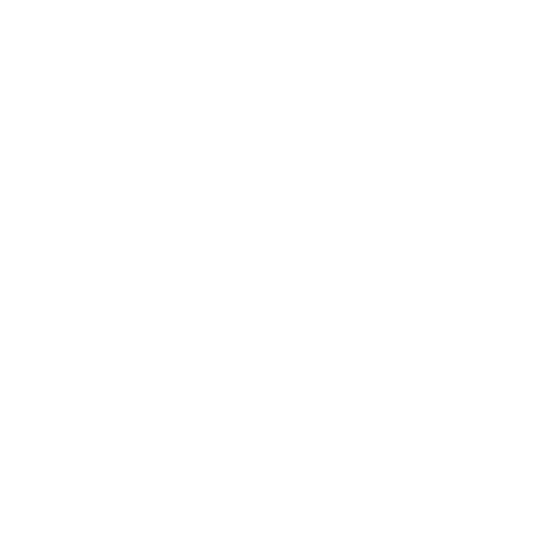

In [134]:
# Create circular bar charts for each year
for year in [2015, 2019, 2021, 2050]:
    create_circular_bar_chart(summary_data_wide, year, 'Value')
    create_circular_bar_chart(summary_data_wide, year, 'Tons')


In [131]:
def create_circular_bar_chart(df, year, variable):
    # Set the constants controlling the plot layout
    upperLimit = 100
    lowerLimit = 80 if variable == 'Tons' else 750  # Adjust this value as needed
    inner_padding = 0  # Add custom value if necessary
    outer_padding = 10  # Add custom value if necessary
    
    # Filter data for the specified year and sort by the variable of interest
    df_year = df[df['Year'] == year].copy()
    df_year = df_year.sort_values(by=variable, ascending=True)
    
    # Initialize the figure
    plt.figure(figsize=(10,10))
    ax = plt.subplot(111, polar=True)
    plt.axis('off')
    
    # Compute the width of each bar
    width = 2 * np.pi / df_year.shape[0]
    
    # Create a color palette
    directions = df['Direction'].unique()
    colors = sns.color_palette('Set3', len(directions))
    color_dict = {direction: color for direction, color in zip(directions, colors)}
    
    # Iterate over each row
    for i, row in df_year.iterrows():
        # Get the current mode, direction and variable value
        mode = row['Mode']
        direction = row['Direction']
        var_value = row[variable]
        
        # Compute the height of the bar using a cube root scale
        max_val = df_year[variable].max()
        slope = (np.cbrt(max_val) - np.cbrt(lowerLimit)) / np.cbrt(max_val)
        height = slope * np.cbrt(var_value) + lowerLimit

        # Compute the angle each bar is centered on
        angle = df_year[variable].rank(method='min')[i] * width
            
        # Draw bars
        ax.bar(
            x=angle, 
            height=height, 
            width=width, 
            bottom=lowerLimit,
            linewidth=2, 
            edgecolor="white",
            color=color_dict[direction]
        )
        
        # Add labels
        if np.pi/2 <= angle < 3*np.pi/2:
            alignment = "right"
            label_radius = lowerLimit + height + outer_padding  # Move the label a bit further out
        else:
            alignment = "left"
            label_radius = lowerLimit + height - inner_padding  # Move the label a bit further in

        ax.text(
            x=angle, 
            y=label_radius, 
            s=f'{mode} {direction}', 
            ha=alignment, 
            va='center', 
            rotation=np.rad2deg(angle), 
            rotation_mode="anchor"
        )
    
    # Create a legend
    legend_elements = [Patch(facecolor=color_dict[direction], label=direction) for direction in directions]
    ax.legend(handles=legend_elements, loc='upper right')

    plt.title(f'Freight Summary for {year} - {variable}')
    
    # Save the figure
    #plt.savefig(f'H:\\My Drive\\7. SNV Industry Study\\1.) Summary\\Mode Pics\\FreightSummary_{year}_{variable}.png', dpi=300)
    plt.show()


In [132]:
# Call the function
for year in [2015, 2019, 2021, 2050]:
    create_circular_bar_chart(summary_data_wide, year, 'Value')
    create_circular_bar_chart(summary_data_wide, year, 'Tons')

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

<Figure size 720x720 with 1 Axes>

In [ ]:
summary_data_wide = summary_date_wide

#summary_table_wide.to_csv('H:\\My Drive\\7. SNV Industry Study\\1.) Summary\\summary_table_wide_ModesDir.csv')
summary_data_wide

In [130]:
summary_data_wide

Year             Mode Direction        Value         Tons
0    2015  Truck Truckload  Outbound 2,584,410.50 2,584,410.50
1    2019  Truck Truckload  Outbound 2,543,640.52 2,543,640.52
2    2021  Truck Truckload  Outbound 2,549,877.38 2,549,877.38
3    2050  Truck Truckload  Outbound 3,358,983.04 3,358,983.04
4    2015         Rail NEC  Outbound    19,090.05    19,090.05
..    ...              ...       ...          ...          ...
107  2050              Air     Intra          nan          nan
108  2015            Other     Intra          nan          nan
109  2019            Other     Intra          nan          nan
110  2021            Other     Intra          nan          nan
111  2050            Other     Intra          nan          nan

[112 rows x 5 columns]